# Import Relevant Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:
#Change fontsize for visualization later
plt.rcParams.update({'font.size': 22})

In [ ]:
df = pd.read_csv("C:/Users/meetp/OneDrive/NTU/Trimester 1/AI and Big Data in Business/Group Project/TripAdvisor_RestauarantRecommendation.csv")
df.head(5)

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,+1 469-620-8463,https://www.tripadvisor.com//Restaurant_Review...,https://sixtyvines.com/menu/plano-tx/,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,+1 315-458-1662,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$


# Data Cleaning

In [ ]:
#Contact Number, Trip_advisor Url and Menu can be dropped as they are not necessary
df = df.drop(['Contact Number', 'Trip_advisor Url','Menu'],axis=1)

In [ ]:
#Check for null values
df.isnull().sum()

Name                0
Street Address      0
Location            0
Type               13
Reviews             0
No of Reviews       0
Comments          615
Price_Range         0
dtype: int64

In [ ]:
#Since there are 2 rows with no reviews or other information, these 2 rows can be dropped
print(df.Reviews.unique())
display(df[df.Reviews=='No review'])

display(df[df['No of Reviews']=='Undefined Number'])

['4.5 of 5 bubbles' '4 of 5 bubbles' '5 of 5 bubbles' '3.5 of 5 bubbles'
 '3 of 5 bubbles' 'No review']


,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


In [ ]:
df = df.drop([1744,2866])
df = df.reset_index(drop=True)
df

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$
...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"Lynnwood, WA 98087-3201","American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,We had to wait a few minutes to get it but it ...,$$ - $$$
3056,City Vineyard,233 West Street,"New York City, NY 10013","American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$
3057,BRIO Tuscan Grille,3710 US Highway 9,"Freehold, NJ 07728-4801","Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,We come to Brio once a month. They are good fo...,$$ - $$$
3058,Maywood Pancake house,92 W Pleasant Ave,"Maywood, NJ 07607-1336","American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$


In [ ]:
#Change type columns to remove comma
df.Comments = df.Comments.fillna('')
df.Type = df.Type.fillna(df.Type.value_counts().index[0])
df.Type = df.Type.str.replace(',',' ')
df.Type

0         Seafood  Vegetarian Friendly  Vegan Options
1                Diner  American  Vegetarian Friendly
2                American  Diner  Vegetarian Friendly
3             American  Wine Bar  Vegetarian Friendly
4                              American  Bar  Seafood
                            ...                      
3055               American  Bar  Vegetarian Friendly
3056                           American  Bar  Seafood
3057                         Steakhouse  Italian  Bar
3058     American  Vegan Options  Gluten Free Options
3059      Italian  Vegetarian Friendly  Vegan Options
Name: Type, Length: 3060, dtype: object

In [ ]:
# Clean Review coloumn to indicate a single number (out of 5)
df['Reviews'] = [i.split()[0] for i in df.Reviews]
df['Reviews'] = df['Reviews'].astype('float')

In [ ]:
# Clean No of Reviews columns to indicate a single number instead of string
df['No of Reviews'] = [i.split()[0].replace(',', '') for i in df['No of Reviews']]
df['No of Reviews'] = df['No of Reviews'].astype('int')

In [ ]:
df

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908",Seafood Vegetarian Friendly Vegan Options,4.5,243,,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337",Diner American Vegetarian Friendly,4.0,84,"Both times we were there very late, after 11 P...",$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476",American Diner Vegetarian Friendly,4.0,256,Waitress was very friendly but a little pricey...,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777",American Wine Bar Vegetarian Friendly,4.5,235,Not sure why I went there for the second time....,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212",American Bar Seafood,4.0,285,Doesn't look like much from the outside but wa...,$$ - $$$
...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"Lynnwood, WA 98087-3201",American Bar Vegetarian Friendly,4.5,198,We had to wait a few minutes to get it but it ...,$$ - $$$
3056,City Vineyard,233 West Street,"New York City, NY 10013",American Bar Seafood,4.5,374,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$
3057,BRIO Tuscan Grille,3710 US Highway 9,"Freehold, NJ 07728-4801",Steakhouse Italian Bar,4.0,211,We come to Brio once a month. They are good fo...,$$ - $$$
3058,Maywood Pancake house,92 W Pleasant Ave,"Maywood, NJ 07607-1336",American Vegan Options Gluten Free Options,4.0,87,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$


# Data Visualization

Most popular types based on number of restaurants

In [ ]:
# Distinct cuisines in the type coloumns
cuisines = []
for i in df.Type:
    for j in i.split():
        cuisines.append(j.strip())
cuisines = set(cuisines)

In [ ]:
# No of restaurants for each type
cuisine_freq = {}
for i in df.Type:
    for j in i.split():
        if j.strip() in cuisine_freq.keys():
            cuisine_freq[j.strip()] += 1
        else:
            cuisine_freq[j.strip()] = 1

In [ ]:
# Converting to dataframe
cuisine = pd.DataFrame(cuisine_freq, index = [0])
cuisine = cuisine.transpose()
cuisine.columns = ['No of Restaurants']
cuisine.sort_values(by=['No of Restaurants'], ascending=False, inplace = True)
cuisine

#Consider only top 10 types
cuisines_top = cuisine[:13]
cuisines_top = cuisines_top.drop("Friendly")
cuisines_top  = cuisines_top.drop("Options")
cuisines_top  = cuisines_top.drop("Free")
cuisines_top

,No of Restaurants
American,1575
Vegetarian,1553
Bar,602
Italian,588
Vegan,428
Seafood,305
Asian,278
Gluten,270
Pizza,254
Steakhouse,229


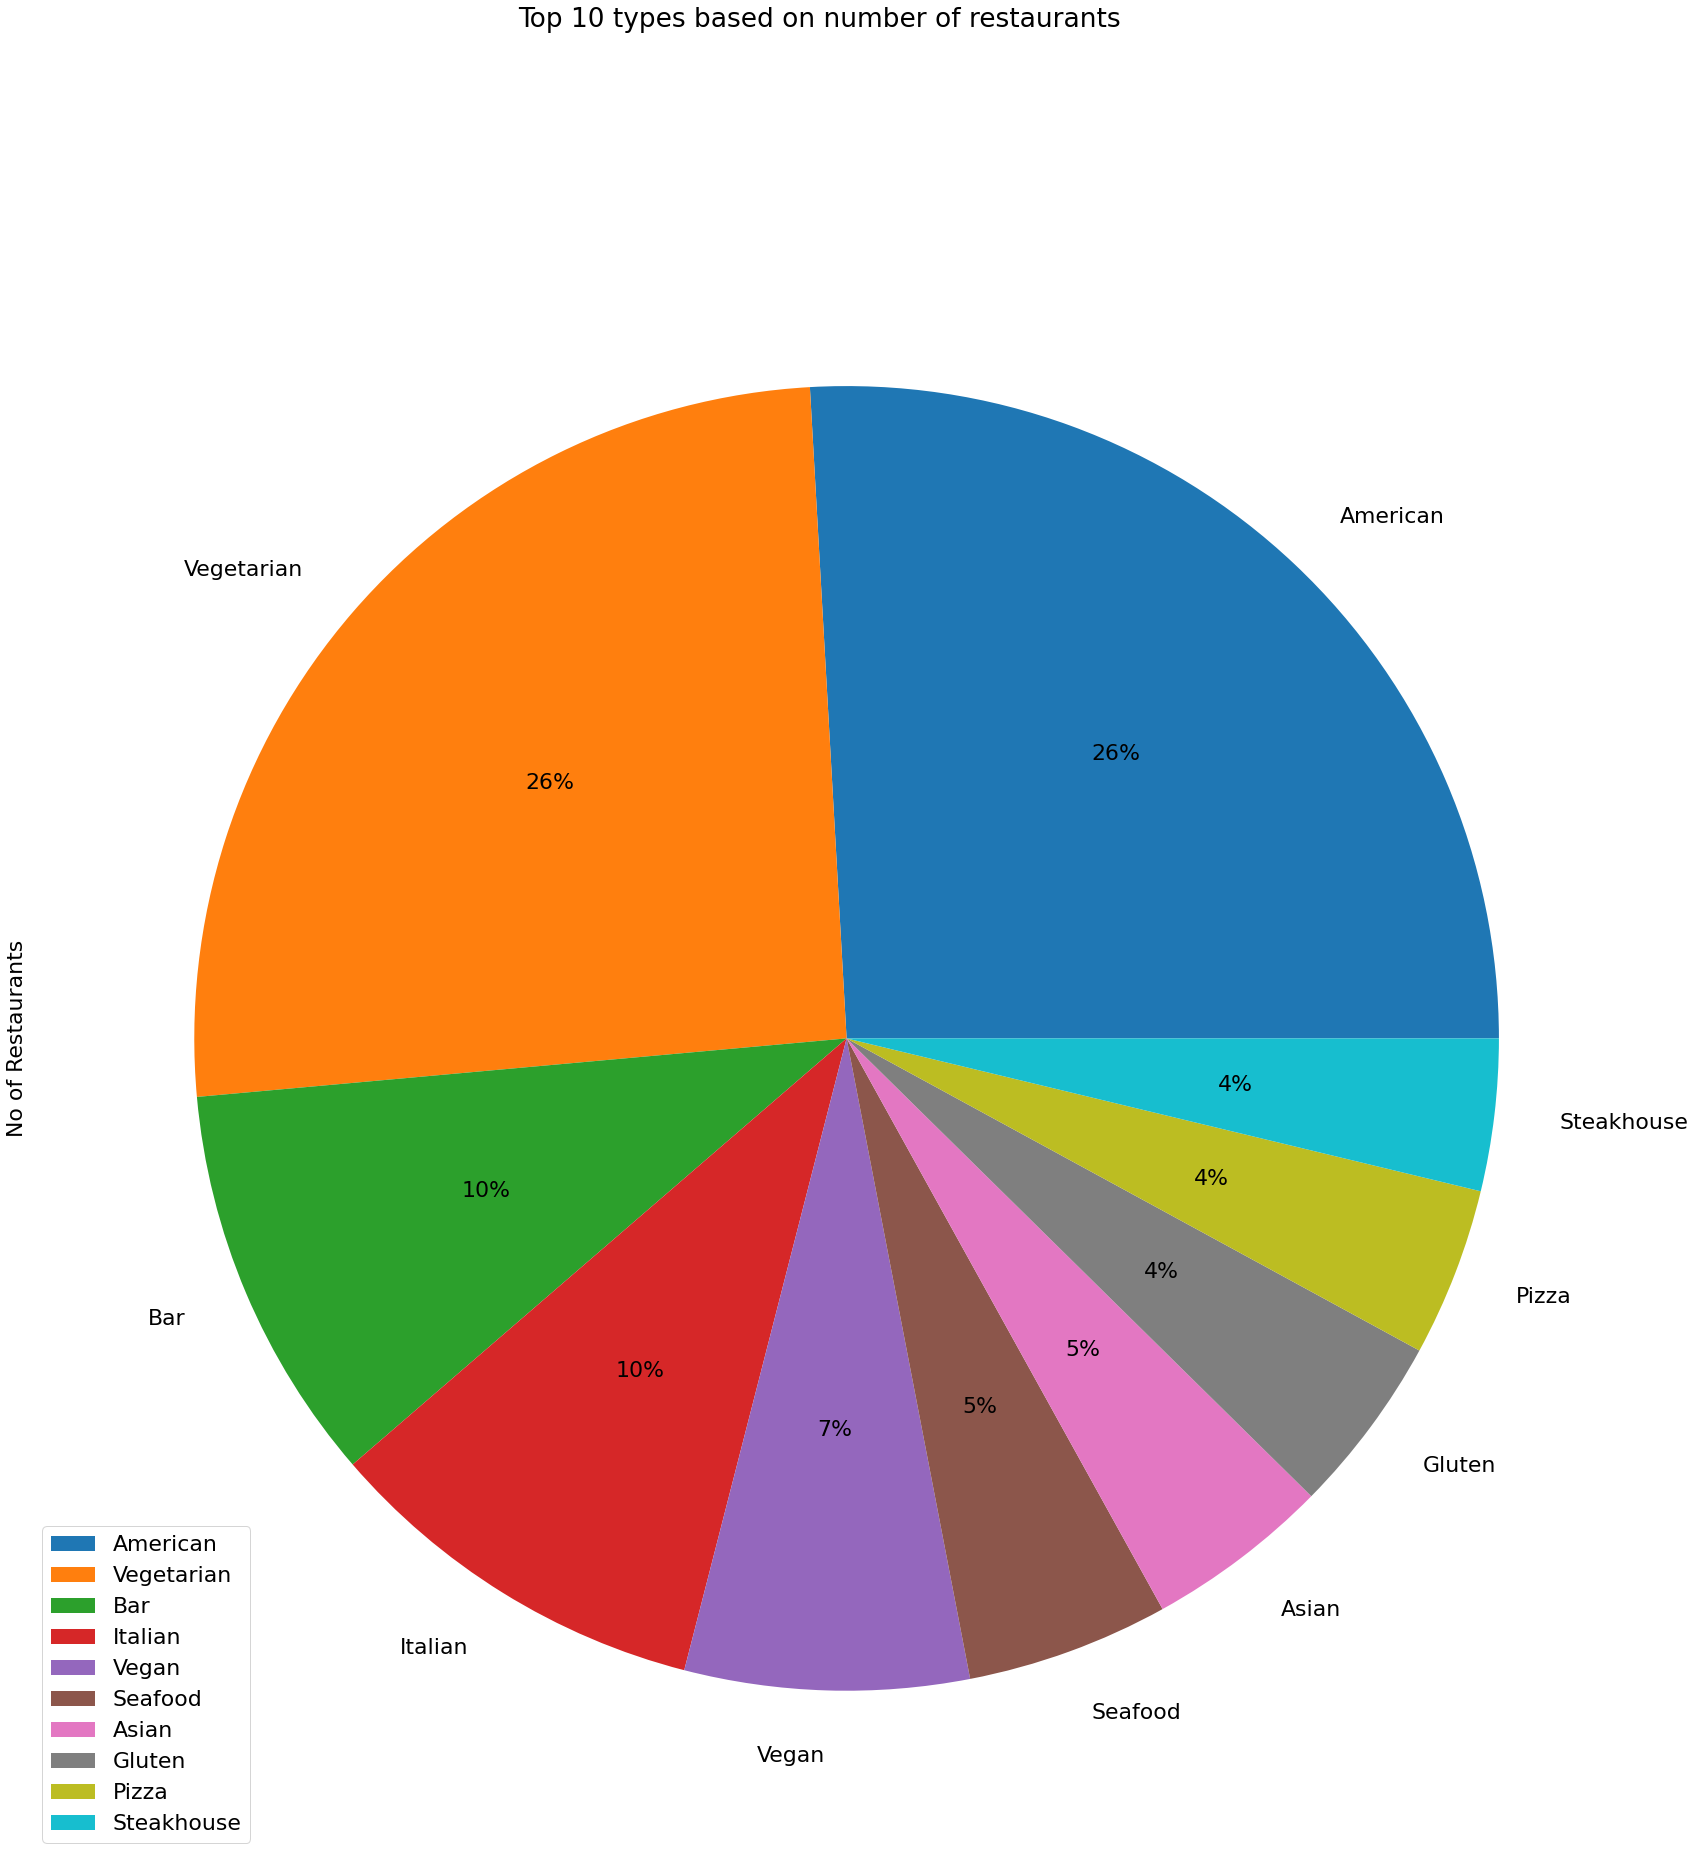

In [ ]:
# Bar Chart reflecting top 10 cusisines
popular_type = cuisines_top.plot(kind = 'pie' , figsize=(30,30), title = "Top 10 types based on number of restaurants", subplots = True, autopct='%1.0f%%')

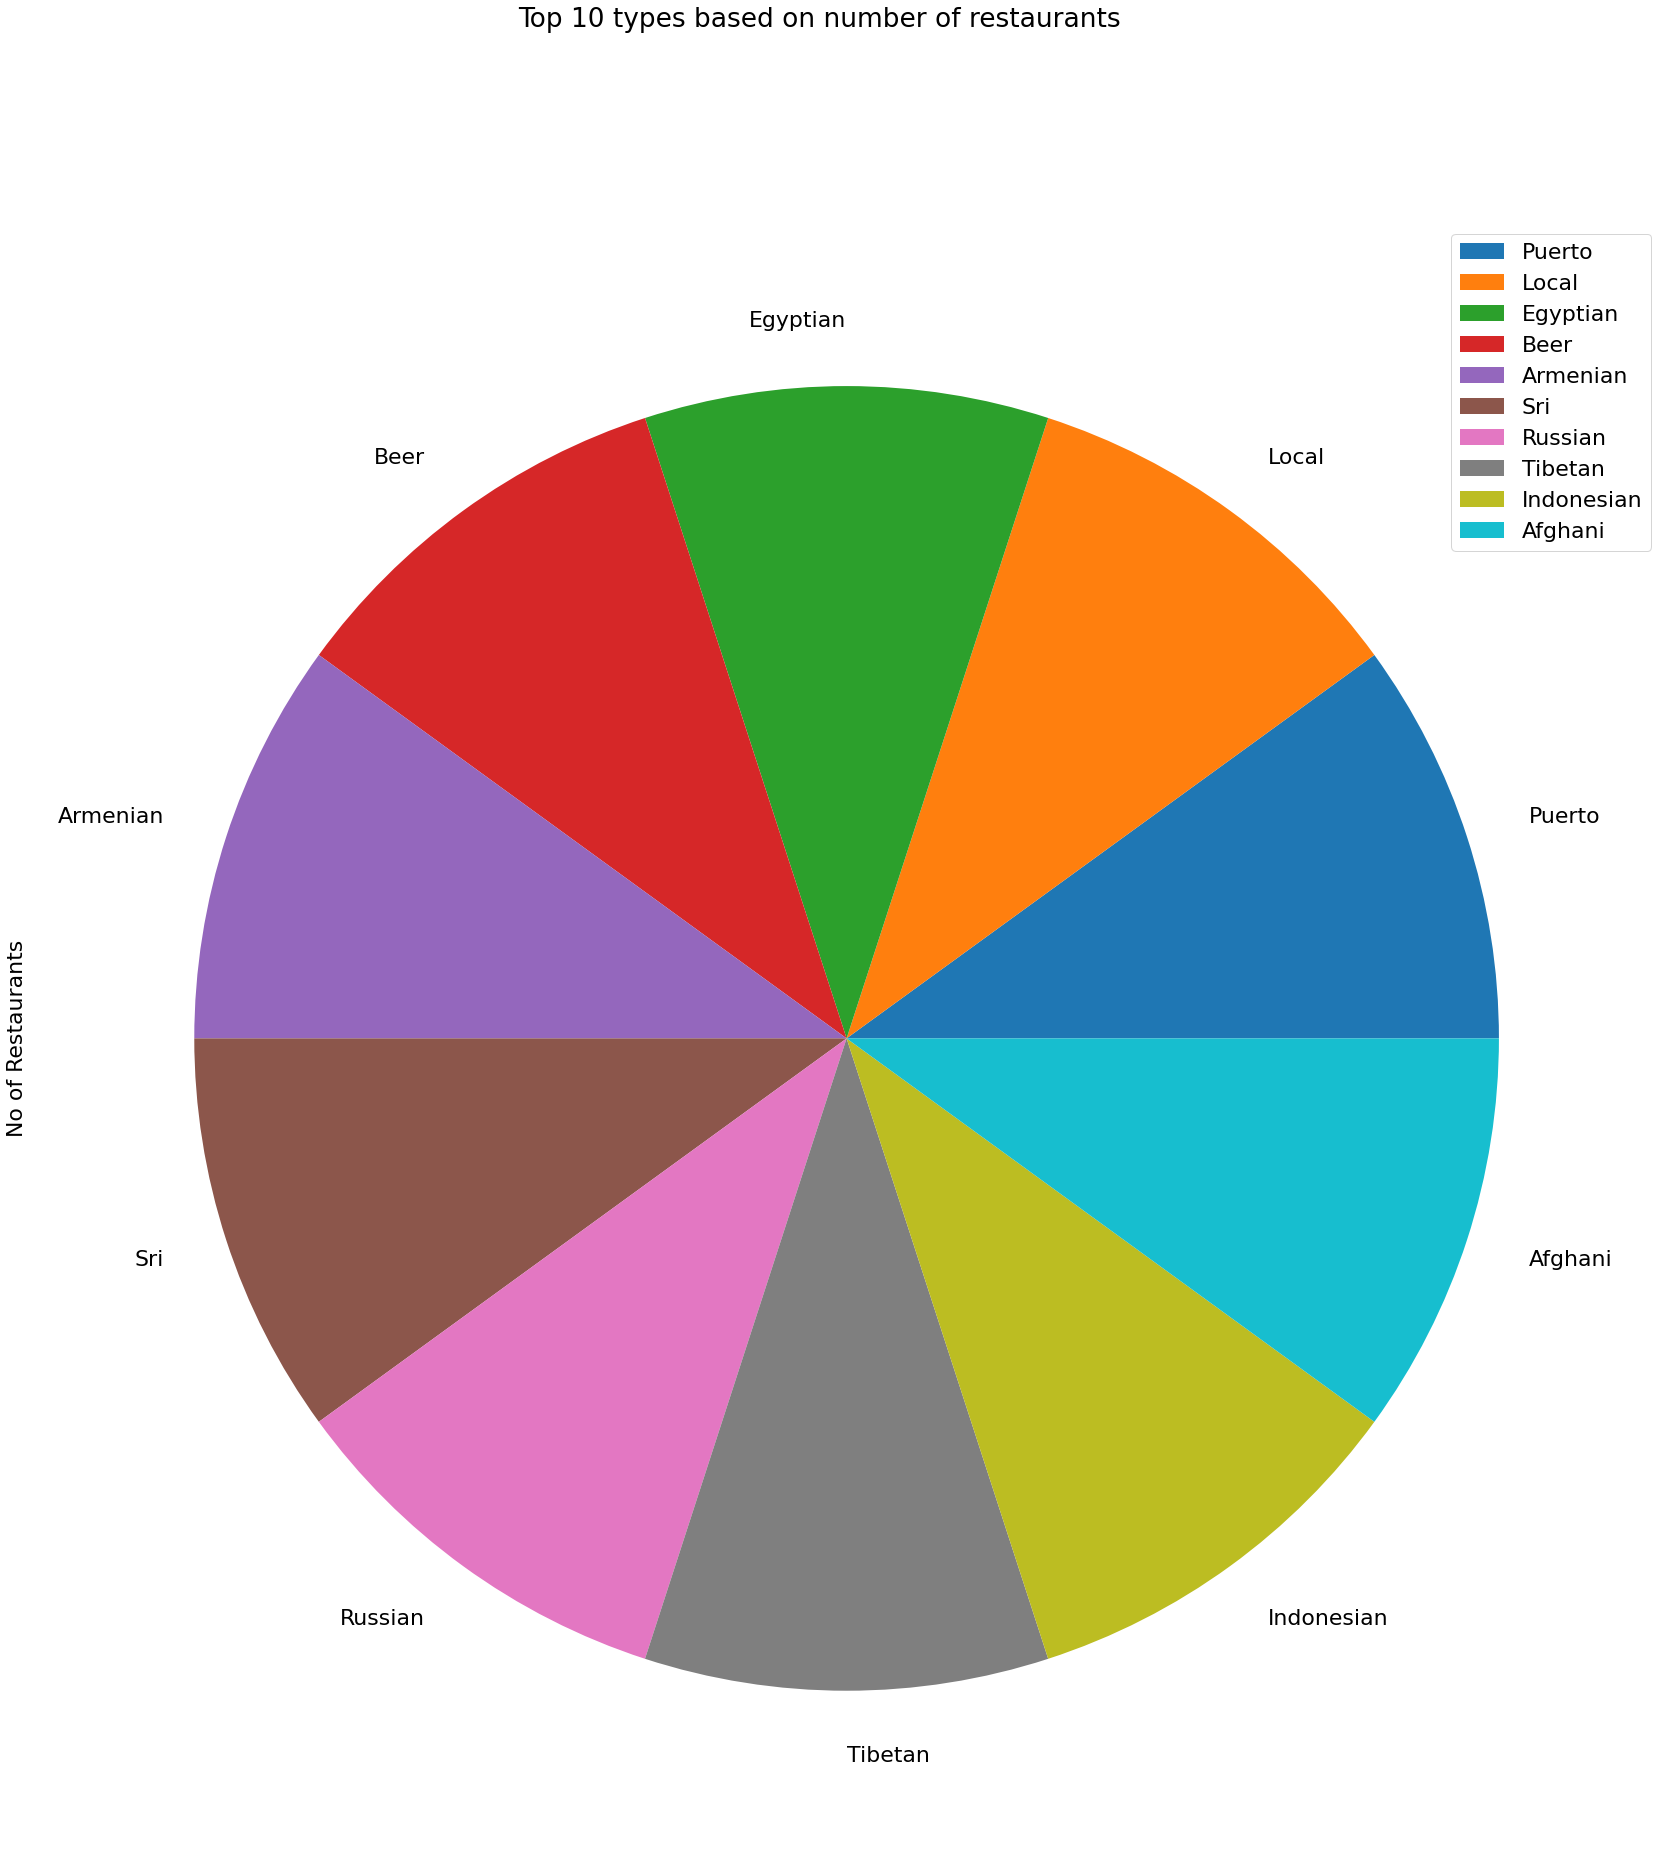

In [ ]:
# Bar Chart reflecting bottom 10 cusisines

cuisines_bottom = cuisine.tail(16)
cuisines_bottom  = cuisines_bottom.drop("Lankan")
cuisines_bottom  = cuisines_bottom.drop("a")
cuisines_bottom  = cuisines_bottom.drop("With")
cuisines_bottom  = cuisines_bottom.drop("restaurants")
cuisines_bottom  = cuisines_bottom.drop("Dine")
cuisines_bottom  = cuisines_bottom.drop("Rican")
cuisines_bottom

non_popular_type = cuisines_bottom.plot(kind = 'pie' , figsize=(30,30), title = "Top 10 types based on number of restaurants", subplots=True)

Most popular types based on average reviews

In [ ]:
type_avgreview = {}
for i in cuisines:
    if len(df[df['Type'].str.contains(i) == True]):
        type_avgreview[i] = df[df['Type'].str.contains(i) == True]['Reviews'].mean()
        
#Convert to dataframe
type_review_avg = pd.DataFrame(type_avgreview, index = [0])
type_review_avg = type_review_avg.transpose()
type_review_avg.columns = ['Average Review']
type_review_avg.sort_values(by=['Average Review'], ascending=False, inplace = True)
type_review_avg

#Consider only top 10 types
type_review_avg_top = type_review_avg[:12]
type_review_avg_top = type_review_avg_top.drop('With')
type_review_avg_top = type_review_avg_top.drop('Chef')
type_review_avg_top.rename(index={"Sri": "Sri Lanka"})
type_review_avg_top

,Average Review
Local,5.000000
Dessert,4.750000
Hawaiian,4.571429
Israeli,4.500000
Tibetan,4.500000
Armenian,4.500000
Indonesian,4.500000
Belgian,4.500000
Afghani,4.500000
Bakeries,4.500000


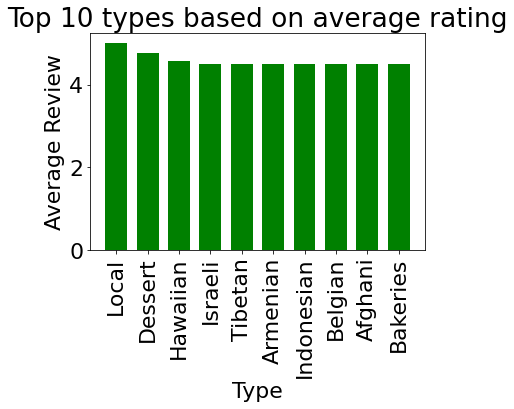

In [ ]:
# Bar Chart reflecting top 10 cusisines based on average rating

#plt.bar(type_review_avg_top.index.values, type_review_avg_top["Average Review"], color=['pink','blue','yellow','green','red','black','cyan','magenta','green','blue'], width = 0.7)
plt.bar(type_review_avg_top.index.values, type_review_avg_top["Average Review"], color=['green'], width = 0.7)
plt.xlabel("Type")
plt.ylabel("Average Review")
plt.title("Top 10 types based on average rating")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Bar Chart reflecting top 10 cusisines based on average rating
#popular_type_avgreview = type_review_avg_top.plot(kind = 'bar', figsize=(20,20), title = "Top 10 types based on average reviews")
#popular_type_avgreview.set_xlabel("Type")
#popular_type_avgreview.set_ylabel("Average Review")

Most popular types based on number of reviews

In [ ]:
type_noreview = {}
for i in cuisines:
    if len(df[df['Type'].str.contains(i) == True]):
        type_noreview[i] = df[df['Type'].str.contains(i) == True]['No of Reviews'].mean()
        
#Convert to dataframe
type_review_no = pd.DataFrame(type_noreview, index = [0])
type_review_no = type_review_no.transpose()
type_review_no.columns = ['No of Reviews']
type_review_no.sort_values(by=['No of Reviews'], ascending=False, inplace = True)
type_review_no

#Consider only top 10 types
type_review_no_top = type_review_no[:10]
type_review_no_top

,No of Reviews
Neapolitan,1458.583333
Tuscan,1438.375000
Canadian,1342.000000
Campania,1110.000000
Central-Italian,845.750000
Sicilian,763.666667
Northern-Italian,703.000000
Taiwanese,665.500000
&,630.200000
Cajun,630.200000


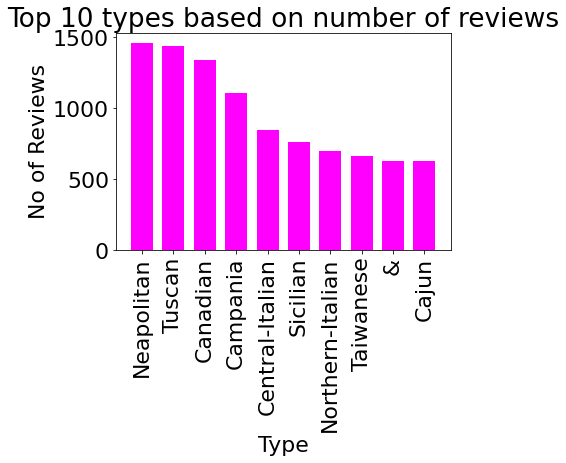

In [ ]:
# Bar Chart reflecting top 10 cusisines based on no of ratings
#plt.bar(type_review_no_top.index.values, type_review_no_top["No of Reviews"], color=['pink','blue','yellow','green','red','black','cyan','magenta','green','blue'], width = 0.7)
plt.bar(type_review_no_top.index.values, type_review_no_top["No of Reviews"], color=['magenta'], width = 0.7)
plt.xlabel("Type")
plt.ylabel("No of Reviews")
plt.title("Top 10 types based on number of reviews")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Bar Chart reflecting top 10 cusisines based on no of ratings
# popular_type_noreview = type_review_no_top.plot(kind = 'bar', figsize=(20,20), title = "Top 10 types based on average reviews")
# popular_type_noreview.set_xlabel("Type")
# popular_type_noreview.set_ylabel("No of Reviews")

Most Expensive and Least Expensive Types

In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2[df2.Price_Range.str.contains("American") == False]
df2 = df2[df2.Price_Range.str.contains("Not Specified") == False]
df2 = df2[df2.Price_Range.str.contains("Italian") == False]

In [ ]:
df2['Price_Range'] = df['Price_Range'].replace(['$$ - $$$','$$$$','$'],[2,3,1])
df2

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908",Seafood Vegetarian Friendly Vegan Options,4.5,243,,2
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337",Diner American Vegetarian Friendly,4.0,84,"Both times we were there very late, after 11 P...",2
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476",American Diner Vegetarian Friendly,4.0,256,Waitress was very friendly but a little pricey...,2
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777",American Wine Bar Vegetarian Friendly,4.5,235,Not sure why I went there for the second time....,2
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212",American Bar Seafood,4.0,285,Doesn't look like much from the outside but wa...,2
...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"Lynnwood, WA 98087-3201",American Bar Vegetarian Friendly,4.5,198,We had to wait a few minutes to get it but it ...,2
3056,City Vineyard,233 West Street,"New York City, NY 10013",American Bar Seafood,4.5,374,"Came here to see Andrea Gibson perform, we wer...",2
3057,BRIO Tuscan Grille,3710 US Highway 9,"Freehold, NJ 07728-4801",Steakhouse Italian Bar,4.0,211,We come to Brio once a month. They are good fo...,2
3058,Maywood Pancake house,92 W Pleasant Ave,"Maywood, NJ 07607-1336",American Vegan Options Gluten Free Options,4.0,87,Stopped in yesterday for Breakfast. When in Je...,2


In [ ]:
df2['Price_Range'].unique()

array([2, 3, 1], dtype=object)

In [ ]:
type_price = {}
for i in cuisines:
    if len(df2[df2['Type'].str.contains(i) == True]):
        type_price[i] = df2[df2['Type'].str.contains(i) == True]['Price_Range'].mean()
        
#Convert to dataframe
type_price_df = pd.DataFrame(type_price, index = [0])
type_price_df = type_price_df.transpose()
type_price_df
type_price_df.columns = ['Price_Range']
type_price_df.sort_values(by=['Price_Range'], ascending=False, inplace = True)
type_price_df

#Consider top 5 types
type_price_top = type_price_df[:5]
type_price_top

#Consider bottom 5 types
type_price_bottom = type_price_df.tail(7)
type_price_bottom

type_prices = pd.concat([type_price_top,type_price_bottom])
type_prices = type_prices.drop('Bites')
type_prices = type_prices.drop('Food')
type_prices

,Price_Range
Canadian,3.000000
Indonesian,3.000000
Steakhouse,2.598253
Brazilian,2.500000
Catalan,2.500000
Dessert,1.500000
Quick,1.333333
Fast,1.071429
Swedish,1.000000
Scandinavian,1.000000


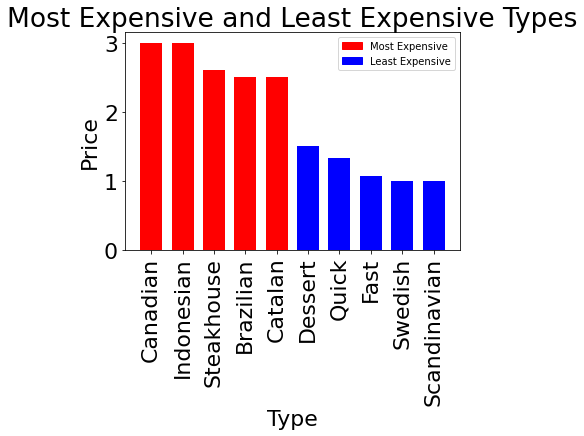

In [ ]:
# Bar Chart reflecting most expensive and least expensive types
plt.bar(type_prices.index.values, type_prices["Price_Range"], color=['red','red','red','red','red','blue','blue','blue','blue','blue'], width = 0.7)
plt.xlabel("Type")
plt.ylabel("Price")
plt.title("Most Expensive and Least Expensive Types")
plt.xticks(rotation = 90)

colors = {'Most Expensive':'red', 'Least Expensive':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, fontsize=10)

plt.show()

In [ ]:
# Bar Chart reflecting most expensive and least expensive types
#type_prices_graph = type_prices.plot(kind = 'bar', figsize=(20,20), title = "Most Expensive and Least Expensive Types")
#type_prices_graph.set_xlabel("Type")
#type_prices_graph.set_ylabel("Price")

# Model

In [ ]:
df.Type = df.Type.str.replace(',',' ')

In [ ]:
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

In [ ]:
tfidf = TfidfVectorizer()

### Construct the required tf-idf matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df.Type)

### Output Shape of tf-idf matrix
tfidf_matrix.shape

(3060, 113)

In [ ]:
print(tfidf_matrix)

  (0, 76)	0.44381897515333935
  (0, 108)	0.5279162138713593
  (0, 43)	0.2987465855164762
  (0, 109)	0.2987465855164762
  (0, 91)	0.5880732468919687
  (1, 2)	0.3249947317914844
  (1, 34)	0.8244479683871282
  (1, 43)	0.32761560687039765
  (1, 109)	0.32761560687039765
  (2, 2)	0.3249947317914844
  (2, 34)	0.8244479683871282
  (2, 43)	0.32761560687039765
  (2, 109)	0.32761560687039765
  (3, 9)	0.4007388507373811
  (3, 111)	0.8034459354277806
  (3, 2)	0.2528584772538054
  (3, 43)	0.25489761948196815
  (3, 109)	0.25489761948196815
  (4, 9)	0.5806650507660195
  (4, 2)	0.3663884354138148
  (4, 91)	0.7270403105838854
  (5, 80)	0.6355899428537418
  (5, 59)	0.4829194920002353
  (5, 91)	0.602340592015358
  (6, 99)	0.7547298123535884
  :	:
  (3053, 109)	0.31910668699344097
  (3054, 48)	0.7160633864626031
  (3054, 68)	0.5956987513789221
  (3054, 43)	0.25728993778741316
  (3054, 109)	0.25728993778741316
  (3055, 9)	0.6730833849346275
  (3055, 2)	0.42470261983892793
  (3055, 43)	0.4281275753948203
  (

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
print(cosine_sim)

[[1.         0.19574809 0.19574809 ... 0.         0.4882597  0.69875267]
 [0.19574809 1.         1.         ... 0.         0.06991257 0.20908866]
 [0.19574809 1.         1.         ... 0.         0.06991257 0.20908866]
 ...
 [0.         0.         0.         ... 1.         0.         0.25737884]
 [0.4882597  0.06991257 0.06991257 ... 0.         1.         0.52153545]
 [0.69875267 0.20908866 0.20908866 ... 0.25737884 0.52153545 1.        ]]


In [ ]:
print(cosine_sim.shape)

(3060, 3060)


In [ ]:
indices = pd.Series(df.index, index=df.Name).drop_duplicates()
indices

Name
Betty Lou's Seafood and Grill       0
Coach House Diner                   1
Table Talk Diner                    2
Sixty Vines                         3
The Clam Bar                        4
                                 ... 
Indigo Kitchen & Ale House       3055
City Vineyard                    3056
BRIO Tuscan Grille               3057
Maywood Pancake house            3058
Porto Leggero                    3059
Length: 3060, dtype: int64

In [ ]:
def get_recommendations(restype, cosine_sim=cosine_sim):
    
    idx = indices[restype]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    sim_scores = sim_scores[1:11]
    
    restaurant_indices = [i[0] for i in sim_scores]
    
    return df['Name'].iloc[restaurant_indices]

In [ ]:
get_recommendations('Coach House Diner')

2                       Table Talk Diner
138                   Milt's Coffee Shop
196                       Triangle Diner
311                         Ruby's Diner
358                Mustache Bill's Diner
461                         Silver Diner
624                            ButtercuP
692    Elmer's Restaurant - Palm Springs
694                           Tops Diner
705                Golden Dawn Diner III
Name: Name, dtype: object

In [ ]:
cv=CountVectorizer() 
word_count_vector=cv.fit_transform(df.Type)
print(word_count_vector)

  (0, 91)	1
  (0, 109)	1
  (0, 43)	1
  (0, 108)	1
  (0, 76)	1
  (1, 109)	1
  (1, 43)	1
  (1, 34)	1
  (1, 2)	1
  (2, 109)	1
  (2, 43)	1
  (2, 34)	1
  (2, 2)	1
  (3, 109)	1
  (3, 43)	1
  (3, 2)	1
  (3, 111)	1
  (3, 9)	1
  (4, 91)	1
  (4, 2)	1
  (4, 9)	1
  (5, 91)	1
  (5, 59)	1
  (5, 80)	1
  (6, 2)	1
  :	:
  (3053, 59)	1
  (3054, 109)	1
  (3054, 43)	1
  (3054, 68)	1
  (3054, 48)	1
  (3055, 109)	1
  (3055, 43)	1
  (3055, 2)	1
  (3055, 9)	1
  (3056, 91)	1
  (3056, 2)	1
  (3056, 9)	1
  (3057, 9)	1
  (3057, 59)	1
  (3057, 99)	1
  (3058, 108)	1
  (3058, 76)	2
  (3058, 2)	1
  (3058, 47)	1
  (3058, 41)	1
  (3059, 109)	1
  (3059, 43)	1
  (3059, 108)	1
  (3059, 76)	1
  (3059, 59)	1


In [ ]:
print(word_count_vector.shape)

(3060, 113)


In [ ]:
cosine_sim1 = linear_kernel(word_count_vector, word_count_vector)
print(cosine_sim1)

[[5. 2. 2. ... 0. 3. 4.]
 [2. 4. 4. ... 0. 1. 2.]
 [2. 4. 4. ... 0. 1. 2.]
 ...
 [0. 0. 0. ... 3. 0. 1.]
 [3. 1. 1. ... 0. 8. 3.]
 [4. 2. 2. ... 1. 3. 5.]]


In [ ]:
print(cosine_sim1.shape)

(3060, 3060)


In [ ]:
def get_recommendations1(restype, cosine_sim=cosine_sim1):
    
    idx = indices[restype]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    sim_scores = sim_scores[1:11]
    
    restaurant_indices = [i[0] for i in sim_scores]
    
    return df['Name'].iloc[restaurant_indices]

In [ ]:
get_recommendations1('Coach House Diner')

2                       Table Talk Diner
138                   Milt's Coffee Shop
196                       Triangle Diner
311                         Ruby's Diner
358                Mustache Bill's Diner
461                         Silver Diner
624                            ButtercuP
692    Elmer's Restaurant - Palm Springs
694                           Tops Diner
705                Golden Dawn Diner III
Name: Name, dtype: object